In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load the data
data=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#features and target
features=data[["MonthlyIncome","Age","DailyRate","YearsSinceLastPromotion","OverTime","YearsWithCurrManager","YearsAtCompany","JobInvolvement"]]
target=data["Attrition"]
data.shape

(1470, 35)

In [ ]:
new_features=pd.get_dummies(features,drop_first=True)
new_features.head(10)

,MonthlyIncome,Age,DailyRate,YearsSinceLastPromotion,YearsWithCurrManager,YearsAtCompany,JobInvolvement,OverTime_Yes
0,5993,41,1102,0,5,6,3,1
1,5130,49,279,1,7,10,2,0
2,2090,37,1373,0,0,0,2,1
3,2909,33,1392,3,0,8,3,1
4,3468,27,591,2,2,2,3,0
5,3068,32,1005,3,6,7,3,0
6,2670,59,1324,0,0,1,4,1
7,2693,30,1358,0,0,1,3,0
8,9526,38,216,1,8,9,2,0
9,5237,36,1299,7,7,7,3,0


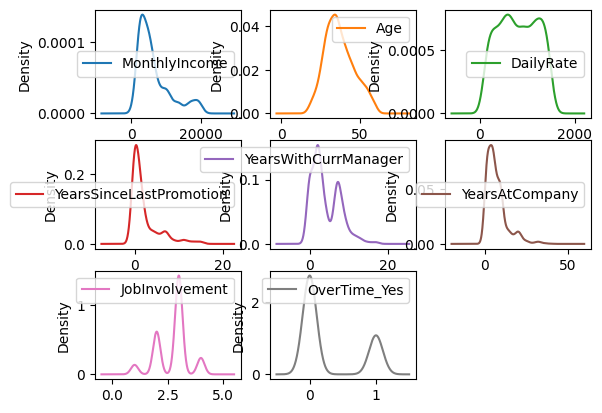

In [ ]:
new_features.plot(kind='density',layout=(3,3),subplots=True,sharex=False)
plt.show()

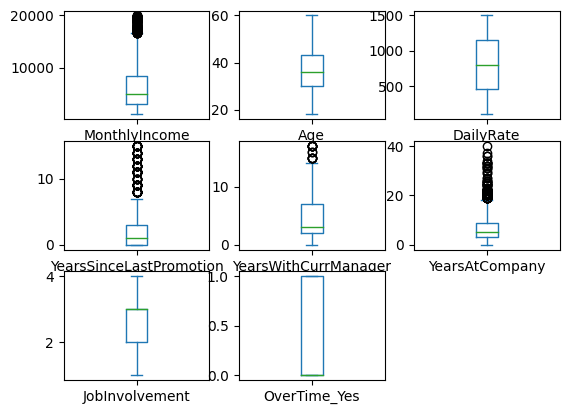

In [ ]:
new_features.plot(kind='box',layout=(3,3),subplots=True,sharex=False)
plt.show()

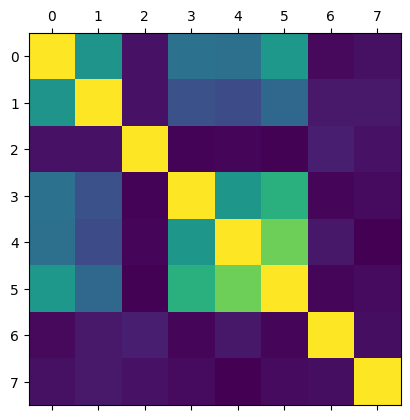

In [ ]:
plt.matshow(new_features.corr())
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scaled_features=mms.fit_transform(new_features)
final_features=pd.DataFrame(scaled_features,columns=["MonthlyIncome","Age","DailyRate","YearsSinceLastPromotion","YearsWithCurrManager","YearsAtCompany","JobInvolvement","OverTime"])
final_features.head(5)

,MonthlyIncome,Age,DailyRate,YearsSinceLastPromotion,YearsWithCurrManager,YearsAtCompany,JobInvolvement,OverTime
0,0.262454,0.547619,0.715820,0.000000,0.294118,0.15,0.666667,1.0
1,0.217009,0.738095,0.126700,0.066667,0.411765,0.25,0.333333,0.0
2,0.056925,0.452381,0.909807,0.000000,0.000000,0.00,0.333333,1.0
3,0.100053,0.357143,0.923407,0.200000,0.000000,0.20,0.666667,1.0
4,0.129489,0.214286,0.350036,0.133333,0.117647,0.05,0.666667,0.0


In [ ]:
#train and test the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_features,target,test_size=0.30,random_state=128)

In [ ]:
from sklearn.ensemble import *
model=RandomForestClassifier(max_depth=2,random_state=125,n_estimators=750)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=750, random_state=125)

In [ ]:
y_pred=model.predict(x_test)
# print(y_test)
# print(y_pred)

In [ ]:
from sklearn.metrics import *
# print(accuracy_score(y_test,y_pred))
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

          No       0.86      1.00      0.92       379
         Yes       0.00      0.00      0.00        62

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.79       441



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


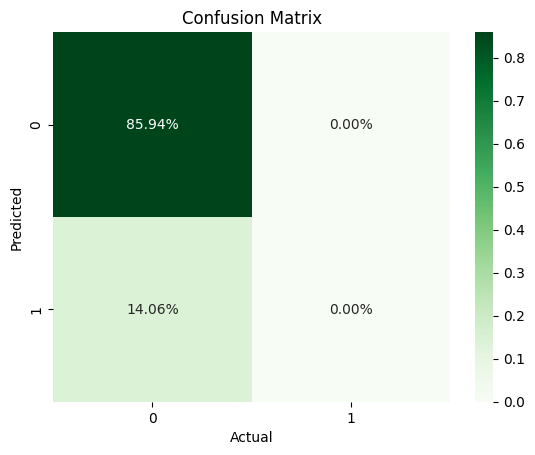

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm/np.sum(cm),annot=True,cmap="Greens",fmt=".2%")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
mi=float(input("enter monthly income: "))
age=int(input("enter age: "))
daily_rate=int(input("enter per day salary: "))
yslp=int(input("how many years since last promotion: "))
ywcm=int(input("how many years with current manager: "))
yic=int(input("how many years in the company: "))
ji=int(input("job involvement b/w 1 to 4: "))
ot=int(input("work overtime: 0-no, 1-yes: : "))
d=[[mi,age,daily_rate,yslp,ywcm,yic,ji,ot]]
nd=mms.fit_transform(d)
res=model.predict(nd)[0]
prob_no=float(model.predict_proba(nd)[0][0])
prob_yes=float(model.predict_proba(nd)[0][1])
prob_max=round(max(prob_yes,prob_no)*100,2)
msg=str(res)+" with a "+str(prob_max)+"% chance"

enter monthly income: 25000
enter age: 23
enter per day salary: 1200
how many years since last promotion: 1
how many years with current manager: 0
how many years in the company: 1
job involvement b/w 1 to 4: 4
work overtime: 0-no, 1-yes: : 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(msg)

No with a 60.24% chance
